<a href="https://colab.research.google.com/github/SrizanX/ai-lab/blob/main/AiLabProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Austin Weather Datasets](https://www.kaggle.com/grubenm/austin-weather)

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imports

In [ ]:
import pandas as pd
import numpy as np 
import sklearn as sk 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Read the CSV file

In [ ]:
# Mount CSV
data = pd.read_csv('drive/My Drive/Colab Notebooks/AiLabFinal/austin_weather.csv')

#Sort Dataset
#data.set_index('Date').sort_index()

Show Dataset

In [ ]:
data.head()

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches
0,60,49,75,29.68,7,4,0.46
1,48,36,68,30.13,10,6,0
2,45,27,52,30.49,10,3,0
3,46,28,56,30.45,10,4,0
4,50,40,71,30.33,10,2,T


In [ ]:
data.shape

(1319, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

**Data Exploration**

In [ ]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/AiLabFinal/austin_weather.csv')
df.set_index('Date').sort_index()

# use average data only
columns_of_interest = ['TempAvgF','DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH', 'PrecipitationSumInches']
data = df[columns_of_interest]
events = df[['Events']].replace(' ', 'None')

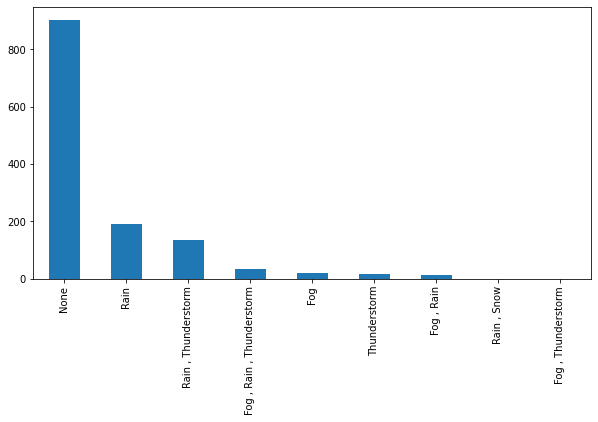

In [ ]:
events.Events.value_counts().plot(kind='bar', figsize=(10,5))

**Histogram**

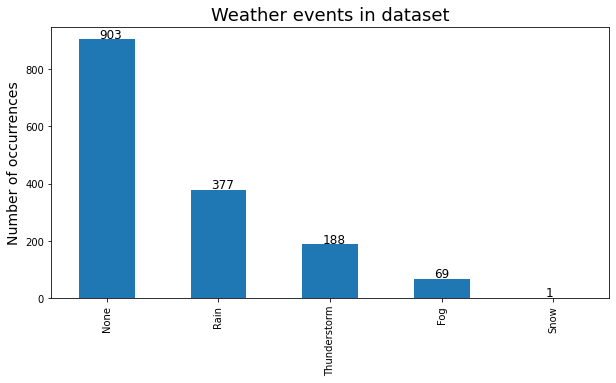

In [ ]:
unique_events = set()
for value in events.Events.value_counts().index:
    splitted = [x.strip() for x in value.split(',')]
    unique_events.update(splitted)
unique_events

single_events = pd.DataFrame()
for event_type in unique_events:
    event_occurred = events.Events.str.contains(event_type)
    single_events = pd.concat([single_events, pd.DataFrame(data={event_type: event_occurred.values})], join='outer', axis=1)

#single_events.head()
ax = single_events.sum().sort_values(ascending=False).plot.bar(figsize=(10,5))
ax.set_title("Weather events in dataset", fontsize=18)
ax.set_ylabel("Number of occurrences", fontsize=14)
for i in ax.patches:
    ax.text(i.get_x()+.18, i.get_height()+5, i.get_height(), fontsize=12)

**Normalize Input Data**

Replace 'T' and '-' with 0

In [ ]:
#Normalization Code
data = data.drop(['Events', 'Date', 'SeaLevelPressureAvgInches','SeaLevelPressureLowInches'], axis=1)
data = data.replace('T', 0.0)
data = data.replace('-', 0.0)
data.to_csv('austin.csv')
data.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,10,10,7,10,2,16,0


**Algorithm**

We will use linear regression

Graph for day 0

[[0.26603939]]


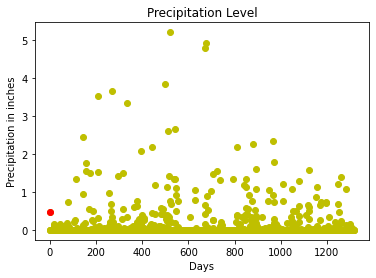

In [ ]:
#Code
data = pd.read_csv("austin.csv")
X = data.drop(['PrecipitationSumInches'], axis=1)
Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1,1)
day_index = 0
days = [i for i in range(Y.size)]
clf = LinearRegression()
clf.fit(X,Y)

inp = np.array([ [29.68], [10], [7], [2], [0], [20], [4], [31], [74], [60], [45], [67], [49], [43], [33], [45], [57] ])
inp = inp.reshape(1, -1)

print(clf.predict(inp))
plt.scatter(days, Y, color='y')
plt.scatter(days[day_index], Y[day_index], color ='r')
plt.title('Precipitation Level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')
plt.show()

Preciptiation Vs Selected Attributes Graph: 


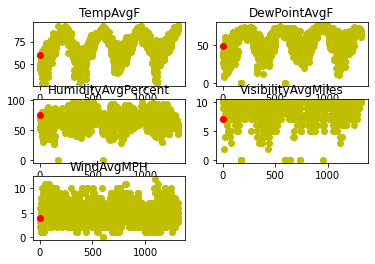

In [ ]:

x_f = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                'WindAvgMPH'], axis=1)
print('Preciptiation Vs Selected Attributes Graph: ')
for i in range(x_f.columns.size):
    plt.subplot(3, 2, i+1)
    plt.scatter(days, x_f[x_f.columns.values[i][:100]], color='y')
    plt.scatter(days[day_index], x_f[x_f.columns.values[i]]
                [day_index], color='r')
    plt.title(x_f.columns.values[i])
# plot a graph with a few features vs precipitation to observe the trends
plt.show()

Graph for day 500

[[0.26603939]]


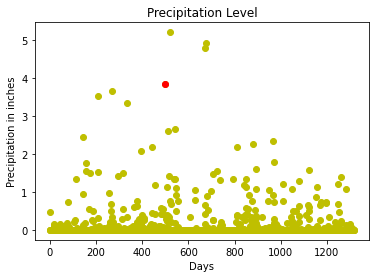

In [ ]:
#Code
data = pd.read_csv("austin.csv")
X = data.drop(['PrecipitationSumInches'], axis=1)
Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1,1)
day_index = 500
days = [i for i in range(Y.size)]
clf = LinearRegression()
clf.fit(X,Y)

inp = np.array([ [29.68], [10], [7], [2], [0], [20], [4], [31], [74], [60], [45], [67], [49], [43], [33], [45], [57] ])
inp = inp.reshape(1, -1)

print(clf.predict(inp))
plt.scatter(days, Y, color='y')
plt.scatter(days[day_index], Y[day_index], color ='r')
plt.title('Precipitation Level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')
plt.show()

Preciptiation Vs Selected Attributes Graph: 


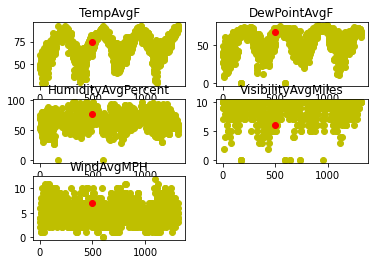

In [ ]:
x_f = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                'WindAvgMPH'], axis=1)
print('Preciptiation Vs Selected Attributes Graph: ')
for i in range(x_f.columns.size):
    plt.subplot(3, 2, i+1)
    plt.scatter(days, x_f[x_f.columns.values[i][:100]], color='y')
    plt.scatter(days[day_index], x_f[x_f.columns.values[i]]
                [day_index], color='r')
    plt.title(x_f.columns.values[i])
# plot a graph with a few features vs precipitation to observe the trends
plt.show()